# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
%matplotlib inline


In [2]:
import PIL.Image as Image
import pickle

In [3]:
def plot_trace(data,t,ax=None,c='C0',band= None):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

In [4]:
from matplotlib.patches import ConnectionPatch

In [5]:
def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

In [7]:
folder = "/mnt/data/spinemodel/conditions/spatial/"
condition = "1000_70_65"
shflag = "sh"
with open(folder+"gatinginfovslv31Diam"+condition+shflag+".pickle","rb") as f:
    aph = pickle.load(f)
    

In [33]:
aph.keys()

dict_keys([('Vspine', 0.0, 0), ('Vsoma', 0.0, 0), ('Vdendrite', 0.0, 0), ('Ca', 0.0, 0), ('data', 0), ('EL0', 0), ('Vspine', -7.5, 0), ('Vsoma', -7.5, 0), ('Vdendrite', -7.5, 0), ('Ca', -7.5, 0), ('Vspine', -15.0, 0), ('Vsoma', -15.0, 0), ('Vdendrite', -15.0, 0), ('Ca', -15.0, 0), ('Vspine', -22.5, 0), ('Vsoma', -22.5, 0), ('Vdendrite', -22.5, 0), ('Ca', -22.5, 0), ('Vspine', -30.0, 0), ('Vsoma', -30.0, 0), ('Vdendrite', -30.0, 0), ('Ca', -30.0, 0), ('Vspine', -37.5, 0), ('Vsoma', -37.5, 0), ('Vdendrite', -37.5, 0), ('Ca', -37.5, 0), ('Vspine', -45.0, 0), ('Vsoma', -45.0, 0), ('Vdendrite', -45.0, 0), ('Ca', -45.0, 0), ('Vspine', -52.5, 0), ('Vsoma', -52.5, 0), ('Vdendrite', -52.5, 0), ('Ca', -52.5, 0), ('Vspine', -60.0, 0), ('Vsoma', -60.0, 0), ('Vdendrite', -60.0, 0), ('Ca', -60.0, 0), ('Vspine', -67.5, 0), ('Vsoma', -67.5, 0), ('Vdendrite', -67.5, 0), ('Ca', -67.5, 0), ('Vspine', 7.5, 0), ('Vsoma', 7.5, 0), ('Vdendrite', 7.5, 0), ('Ca', 7.5, 0), ('Vspine', 15.0, 0), ('Vsoma', 15.0, 0

In [39]:
iters = [item[2] for item in aph.keys() if len(list(item))>2]
np.array(list(set(iters)))%19

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18])

In [8]:
dsv = array([1,2,3,4,5,6,7,8,9])*7.5
dsvc = list(-1.0*dsv); dsvc.reverse()
dsv = concatenate((dsvc,[0],dsv))
diameters = arange(0.2,2.1,0.1)

In [9]:
labels = ['Vspine','Vsoma','Vdendrite','Ca']
EL0s = [-70,-70,-70,0]
nr = 1
shleh = {}
shleh0 = {}
for lab in labels:
    shleh[lab] = zeros((19,11,19))
    shleh0[lab] = zeros((19,11,19))
#                        dsv,?, diameters

for il,lab in enumerate(labels):
    EL0 = EL0s[il]
    for idiam in range(19):
        # columns: no inh, shaft inh, axo-spinal inh
        ap0 = aph[(lab,0.0,idiam)]-EL0

        #Effect very close to inh
        r0shaft = ap0[:,1]/ap0[:,0]
        r0axspi = ap0[:,2]/ap0[:,0]
        for j,dss in enumerate(dsv):
            ap = aph[(lab,dss,idiam)]-EL0
            rshaft = ap[:,1]/ap[:,0]
            raxspi = ap[:,2]/ap[:,0]
            difr = column_stack(((1-rshaft)/(1-r0shaft),(1-raxspi)/(1-r0axspi)))
            # difr = column_stack((rshaft,raxspi))
            shleh0[lab][j,1:,idiam] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
            shleh0[lab][j,0,idiam] = dss
            difr[:,0] = difr[:,0]*(1-r0shaft)
            difr[:,1] = difr[:,1]*(1-r0axspi)
            shleh[lab][j,1:,idiam] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
            shleh[lab][j,0,idiam] = dss

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/export/home1/users/bssn/serna

In [61]:
labels = ['Vspine','Vsoma','Vdendrite','Ca']
EL0s = [-70,-70,-70,0]
nr = 1
shlehm = {}
shleh0m = {}
for lab in labels:
    shlehm[lab] = zeros((19,11,19,3))
    shleh0m[lab] = zeros((19,11,19,3))
#                        dsv,?, diameters

for il,lab in enumerate(labels):
    EL0 = EL0s[il]
    for it in range(19*3):
        idiam = it%19
        iiter =  it//19
        # columns: no inh, shaft inh, axo-spinal inh
        ap0 = aph[(lab,0.0,it)]-EL0

        #Effect very close to inh
        r0shaft = ap0[:,1]/ap0[:,0]
        r0axspi = ap0[:,2]/ap0[:,0]
        for j,dss in enumerate(dsv):
            ap = aph[(lab,dss,it)]-EL0
            rshaft = ap[:,1]/ap[:,0]
            raxspi = ap[:,2]/ap[:,0]
            difr = column_stack(((1-rshaft)/(1-r0shaft),(1-raxspi)/(1-r0axspi)))
            # difr = column_stack((rshaft,raxspi))
            shleh0m[lab][j,1:,idiam,iiter] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
            shleh0m[lab][j,0,idiam,iiter] = dss
            difr[:,0] = difr[:,0]*(1-r0shaft)
            difr[:,1] = difr[:,1]*(1-r0axspi)
            shlehm[lab][j,1:,idiam,iiter] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
            shlehm[lab][j,0,idiam,iiter] = dss

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/export/home1/users/bssn/serna

In [14]:
#@interact
def plot_Sv(ax,idiam = 0, xyleg = (-50,0.02)):
    lab = labels[0]
    axsp = 0
    ax.plot(shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam],'C3-',label='AD')
    ax.fill_between(shleh[lab][:,0,idiam],
                 shleh[lab][:,2+axsp*5,idiam],
                 shleh[lab][:,3+axsp*5,idiam],color='C3',alpha=0.7)

    axsp = 1
    ax.plot(shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam],'C2-',label='AS')
    ax.fill_between(shleh[lab][:,0,idiam],
                 shleh[lab][:,2+axsp*5,idiam],
                 shleh[lab][:,3+axsp*5,idiam],color='C2',alpha=0.7)

    ax.legend()
    ax.set_xlabel('$\Delta x$')
    ax.set_ylabel('$S_V$')
    #ax.set_ylim(-0.01,0.4)
    ax.annotate('D: %.1f $\mu m$' % diameters[idiam],xy =  xyleg)

In [93]:
def plot_Svm(ax,idiam = 0, xyleg = (-50,0.02)):
    lab = labels[0]
    axsp = 0
    xtt = shlehm[lab][:,:,idiam,:]
    xt = xtt.mean(-1)
    xt[:,2+axsp*5] = np.sqrt((xtt[:,2+axsp*5,:]**2).mean(-1))
    xt[:,3+axsp*5] = np.sqrt((xtt[:,3+axsp*5,:]**2).mean(-1))
    ax.plot(xt[:,0],xt[:,1+axsp*5],'C3-',label='Dendritic')
    ax.fill_between(xt[:,0],
                 xt[:,2+axsp*5],
                 xt[:,3+axsp*5],color='C3',alpha=0.7)

    axsp = 1
    xt[:,2+axsp*5] = np.sqrt((xtt[:,2+axsp*5,:]**2).mean(-1))
    xt[:,3+axsp*5] = np.sqrt((xtt[:,3+axsp*5,:]**2).mean(-1))
    ax.plot(shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam],'-', c='darkgreen',label='Spinous')
    ax.fill_between(xt[:,0],
                 xt[:,2+axsp*5],
                 xt[:,3+axsp*5],color='C2',alpha=0.7)

    ax.set_xlabel('$\Delta x$', fontsize = 14)
    #ax.set_ylabel('$S_V$')
    #ax.set_ylim(-0.01,0.4)
    ax.annotate('D: %.1f $\mu m$' % diameters[idiam],xy =  xyleg, fontsize = 14)

In [94]:
#interact(plot_Sv(), x =widgets.IntSlider(min=0,max=19,step=1,value=0))

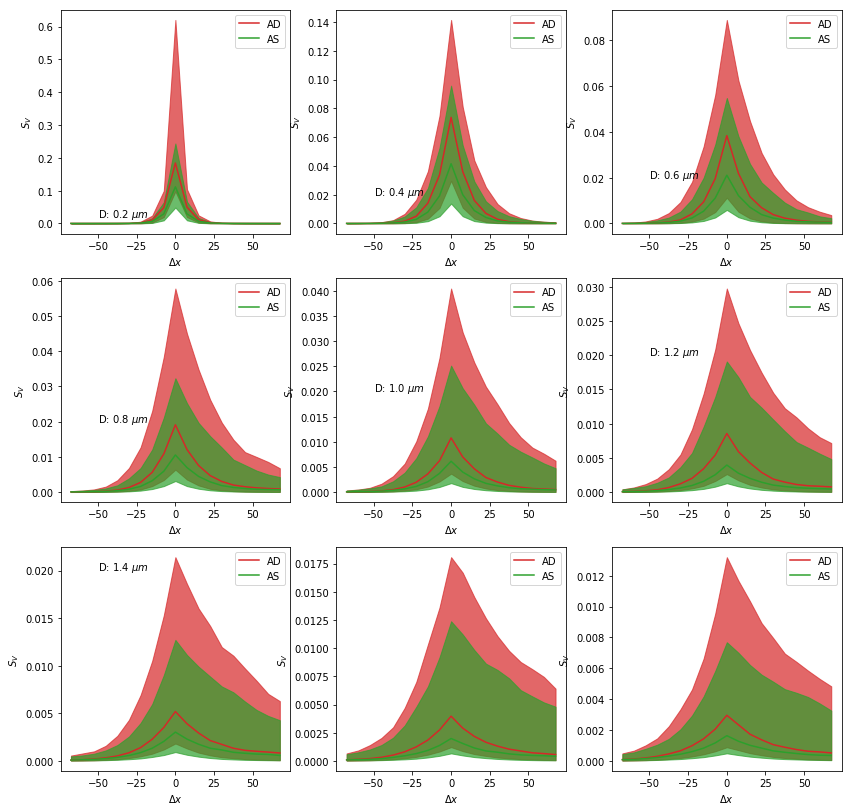

In [15]:
lab = labels[0]
fig,ax = subplots(3,3,figsize=(14,14))
for i in range(9):
    plot_Sv(ax[i//3,i%3],idiam = i*2)
fig.savefig('SM_Svvsdx_diamv31.png',dpi = 300)

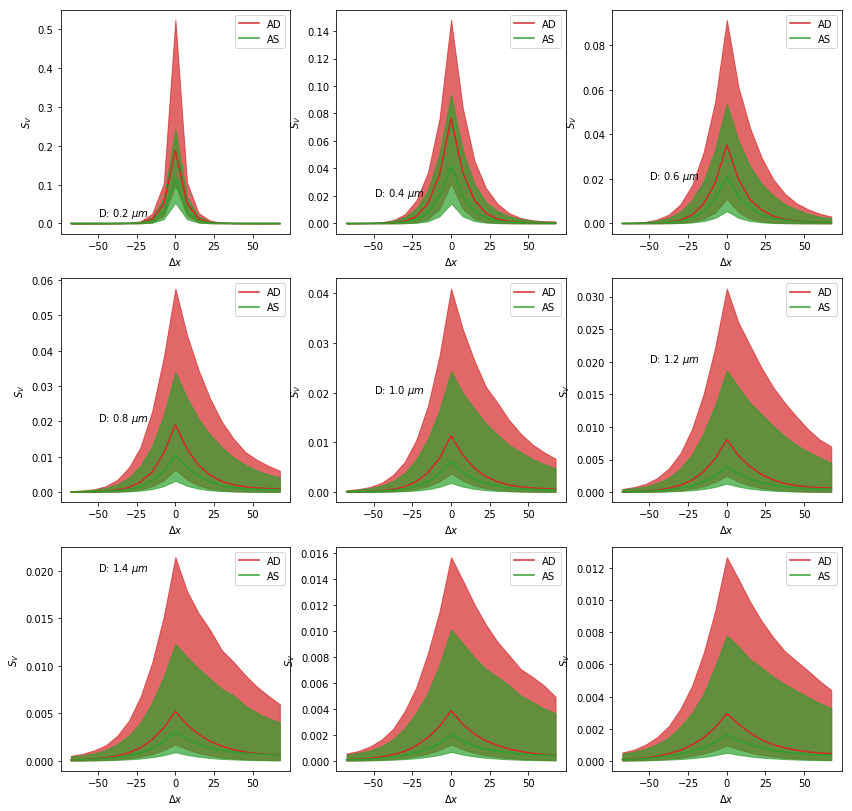

In [62]:
lab = labels[0]
fig,ax = subplots(3,3,figsize=(14,14))
for i in range(9):
    plot_Svm(ax[i//3,i%3],idiam = i*2)

fig.savefig('SM_Svvsdx_diamv31.png',dpi = 300)

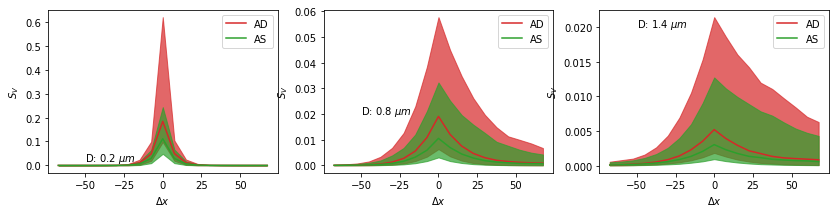

In [16]:
lab = labels[0]
fig,ax = subplots(1,3,figsize=(14,3))
for i in range(3):
    plot_Sv(ax[i%3],idiam = i*6)
fig.savefig('SM_Svvsdx_diamv31b.png',dpi = 300)

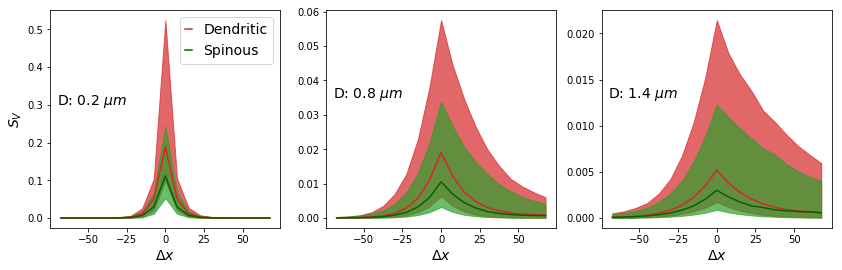

In [95]:
lab = labels[0]
fig,ax = subplots(1,3,figsize=(14,4))
yl = [0.3,0.035,0.013]
for i in range(3):
    plot_Svm(ax[i%3],idiam = i*6, xyleg=(-70,yl[i]))

ax[0].set_ylabel('$S_V$', fontsize = 14)
ax[0].legend(fontsize= 14, handlelength = .5)
fig.savefig('SM_Svvsdx_diamv31b.png',dpi = 300, tight_layout= True)

In [29]:
from scipy.stats import linregress

In [40]:
print(len(diameters))

19


In [66]:
#lab = labels[0]
# axsp = 0
# ax.plot(shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam],'C3-',label='AD')
# ax.fill_between(shleh[lab][:,0,idiam],
#              shleh[lab][:,2+axsp*5,idiam],
#              shleh[lab][:,3+axsp*5,idiam],color='C3',alpha=0.7)

lvsdiamn = zeros((19,9,3))
for it in range(19*3):
    idiam = it%19
    iiter =  it//19
    lvsdiamn[idiam,0,iiter] = diameters[idiam]
    
    for i, axsp in enumerate([1,0]):
    
        xtt = shlehm[lab][:,0,idiam,iiter]
        ytt = shlehm[lab][:,1+axsp*5,idiam,iiter]
        for j, sel in enumerate([xtt>0,xtt<0]):
            xt = xtt[sel]*1.0
            yt = log(ytt[sel])
            lm = linregress(xt,yt)
            
            length = -1./lm.slope
            const = exp(lm.intercept)
            idx = 1+i*2+j*4
            lvsdiamn[idiam,idx:(2+idx),iiter] = length, const 
            

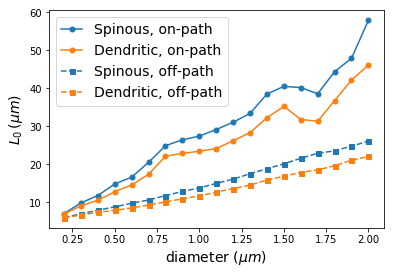

In [92]:
lvst = lvsdiamn.mean(-1)
plot(lvst[:,0],lvst[:,1],'o-',label= 'Spinous, on-path',
    markersize = 5)
plot(lvst[:,0],lvst[:,3],'o-',label= 'Dendritic, on-path',
    markersize = 5)
plot(lvst[:,0],np.abs(lvst[:,5]),'C0s--',label= 'Spinous, off-path',
    markersize = 5)
plot(lvst[:,0],np.abs(lvst[:,7]),'C1s--',label= 'Dendritic, off-path',
    markersize = 5)

xlabel('diameter $(\mu m)$',fontsize = 14)
ylabel('$L_0\, (\mu m)$',fontsize = 14)
legend(fontsize = 14, handlelength = 1.5)
savefig('SM_Livsdenddiam.png',dpi = 300)

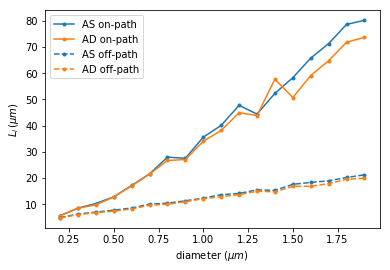

In [14]:
plot(lvsdiam[:,0],lvsdiam[:,1],'.-',label= 'AS on-path')
plot(lvsdiam[:,0],lvsdiam[:,3],'.-',label= 'AD on-path')
plot(lvsdiam[:,0],lvsdiam[:,5],'C0.--',label= 'AS off-path')
plot(lvsdiam[:,0],lvsdiam[:,7],'C1.--',label= 'AD off-path')

xlabel('diameter $(\mu m)$')
ylabel('$L_i\, (\mu m)$')
legend()
savefig('SM_Livsdenddiam.png',dpi = 300)

In [55]:
lvsdiam = zeros((18,9))
for idiam in range(18):
    axsp = 1
    xt,yt = shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam]
    sel = xt>0
    xt = xt[sel]*1.0
    yt = log(yt[sel])
    lm = linregress(xt,yt)
    lvsdiam[idiam,:3] = (diameters[idiam],-1./lm.slope,exp(lm.intercept))
    axsp = 0
    xt,yt = shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam]
    sel = xt>0
    xt = xt[sel]*1.0
    yt = log(yt[sel])
    lm = linregress(xt,yt)
    lvsdiam[idiam,3:5] = (-1./lm.slope,exp(lm.intercept))
    axsp = 1
    xt,yt = shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam]
    sel = xt<0
    xt = -xt[sel]*1.0
    yt = log(yt[sel])
    lm = linregress(xt,yt)
    lvsdiam[idiam,5:7] = (-1./lm.slope,exp(lm.intercept))
    axsp = 0
    xt,yt = shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam]
    sel = xt<0
    xt = -xt[sel]*1.0
    yt = log(yt[sel])
    lm = linregress(xt,yt)
    lvsdiam[idiam,7:] = (-1./lm.slope,exp(lm.intercept))

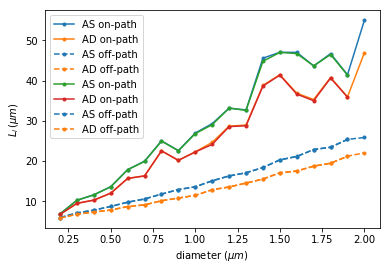

In [57]:
lvst = lvsdiamn.mean(-1)
plot(lvst[:,0],lvst[:,1],'.-',label= 'AS on-path')
plot(lvst[:,0],lvst[:,3],'.-',label= 'AD on-path')
plot(lvst[:,0],np.abs(lvst[:,5]),'C0.--',label= 'AS off-path')
plot(lvst[:,0],np.abs(lvst[:,7]),'C1.--',label= 'AD off-path')

xlabel('diameter $(\mu m)$')
ylabel('$L_i\, (\mu m)$')
legend()

lvst = lvsdiam*1
plot(lvst[:,0],lvst[:,1],'.-',label= 'AS on-path')
plot(lvst[:,0],lvst[:,3],'.-',label= 'AD on-path')
plot(lvst[:,0],np.abs(lvst[:,5]),'C0.--',label= 'AS off-path')
plot(lvst[:,0],np.abs(lvst[:,7]),'C1.--',label= 'AD off-path')

xlabel('diameter $(\mu m)$')
ylabel('$L_i\, (\mu m)$')
legend()